# Anime Wikipedia Web Scraping Mini-Project
This project will focus on scraping information from web HTML and using that data to make data analysis conclusions and create a simple machine learning project from scraped information. The goal of this project is to use movie release data to build a simple recommender. 

Note: This recommender will be very simple, as there is not much data available (mostly just name, release date, and production information). The project is more focused on scraping web information from HTML and using it for analysis.

Wikipedia links:
<br>2023: https://en.wikipedia.org/wiki/2023_in_anime
<br>2022: https://en.wikipedia.org/wiki/2022_in_anime

<div>
<img src="wikiposter.PNG" width=800/>
</div>

## Scraping and Extracting Data

In [33]:
# import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1. Create an HTML session and load in the urls
We'll try to load in the 2023 year first. Note: the table ID used to store the desired information is also listed below.

In [2]:
url1 = 'http://en.wikipedia.org/wiki/2023_in_anime'
table_class = "wikitablem sortable jquery-tablesorter"
response = requests.get(url1)
print(response.status_code)

200


### 2. Use Beautifulsoup to find the desired table
Find the desired table with a beautifulsoup object. We can then convert it into a dataframe.

In [3]:
# parse data fromt he html into beautifulsoup
soup = BeautifulSoup(response.text, 'html.parser')
table_2023 = soup.find('table', {'class':'wikitable'})
table_2023 # check to see that it's loaded in properly

<table border="1" class="wikitable sortable">
<tbody><tr>
<th data-sort-type="text" width="130px">Release date
</th>
<th width="450px">Title
</th>
<th data-sort-type="text" width="130px">Studio
</th>
<th data-sort-type="text" width="130px">Director(s)
</th>
<th width="10px">Running time (minutes)
</th>
<th class="unsortable" width="5px">Ref
</th></tr>
<tr>
<td><span data-sort-value="000000002023-01-20-0000" style="white-space:nowrap">January 20</span>
</td>
<td><i><a href="/wiki/Aikatsu!" title="Aikatsu!">Aikatsu! Mirai e no Starway</a></i>
</td>
<td><a href="/wiki/Bandai_Namco_Pictures" title="Bandai Namco Pictures">Bandai Namco Pictures</a>
</td>
<td>Ryūichi Kimura
</td>
<td>
</td>
<td><sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</td></tr>
<tr>
<td><span data-sort-value="000000002023-01-20-0000" style="white-space:nowrap">January 20</span>
</td>
<td><i><a href="/wiki/Fafner_in_the_Azure" title="Fafner in the Azure">Fafner in the Azure: Behind the Line<

### 3. Convert table into pandas dataframe
We can use pandas.read_html to convert this into a dataframe. We only need the first table of this type, since that's the one containing the _film_ releases of each year.

In [4]:
df = pd.read_html(str(table_2023))
df = pd.DataFrame(df[0])
df.head()

,Release date,Title,Studio,Director(s),Running time (minutes),Ref
0,January 20,Aikatsu! Mirai e no Starway,Bandai Namco Pictures,Ryūichi Kimura,NaN,[1]
1,January 20,Fafner in the Azure: Behind the Line,Production I.G,Takashi Noto,NaN,[2]
2,January 20,SSSS.Gridman,Studio Trigger,Yoshiyuki Kaneko,NaN,[3]
3,January 27,Gold Kingdom and Water Kingdom,Madhouse,Kotono Watanabe,116.0,[4]
4,February 17,Blue Giant,NUT,Yuzuru Tachikawa,NaN,[5]


In [5]:
df.count()

Release date              45
Title                     45
Studio                    42
Director(s)               44
Running time (minutes)     7
Ref                       45
dtype: int64

### 4. Repeat process for year 2022
The data for 2023 has already been loaded in. However, there are not many films total (45, as seen from above)! I'll also add 2022 just to have a larger dataset.

In [6]:
url2 = 'http://en.wikipedia.org/wiki/2022_in_anime'
response = requests.get(url2)
print(response.status_code)

200


In [7]:
soup = BeautifulSoup(response.text, 'html.parser')
table_2022 = soup.find('table', {'class':'wikitable'})

In [8]:
df2 = pd.read_html(str(table_2022))
df2 = pd.DataFrame(df2[0])
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Release date            53 non-null     object 
 1   Title                   53 non-null     object 
 2   Studio                  53 non-null     object 
 3   Director(s)             53 non-null     object 
 4   Running time (minutes)  45 non-null     float64
 5   Ref                     53 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.6+ KB
None


,Release date,Title,Studio,Director(s),Running time (minutes),Ref
0,January 1,BanG Dream! Poppin' Dream!,Sanzigen,Kōdai Kakimoto (Chief) Masanori Uetaka,72.0,[1]
1,January 28 – February 11,The Orbital Children,Production +h,Mitsuo Iso,NaN,[2]
2,January 30,Eien no 831,Craftar,Kenji Kamiyama,105.0,[3]
3,February 4,Star Blazers: Space Battleship Yamato 2205: Ko...,Satelight,Kenji Yasuda,97.0,[4]
4,February 4,The Deer King,Production I.G,Masashi Ando Masayuki Miyaji,114.0,[5]


### 5. Combine dataframes! 
Finally, we should merge the two dataframes. The two tables have the same column names (thank you, Wikipedia), so it should be a simple concat. Let's also add a 'year' column to preserve the year of each film.

In [9]:
df.insert(1, 'Year', 2023)
df.head()

,Release date,Year,Title,Studio,Director(s),Running time (minutes),Ref
0,January 20,2023,Aikatsu! Mirai e no Starway,Bandai Namco Pictures,Ryūichi Kimura,NaN,[1]
1,January 20,2023,Fafner in the Azure: Behind the Line,Production I.G,Takashi Noto,NaN,[2]
2,January 20,2023,SSSS.Gridman,Studio Trigger,Yoshiyuki Kaneko,NaN,[3]
3,January 27,2023,Gold Kingdom and Water Kingdom,Madhouse,Kotono Watanabe,116.0,[4]
4,February 17,2023,Blue Giant,NUT,Yuzuru Tachikawa,NaN,[5]


In [10]:
df2.insert(1, 'Year', 2022)
df2.head()

,Release date,Year,Title,Studio,Director(s),Running time (minutes),Ref
0,January 1,2022,BanG Dream! Poppin' Dream!,Sanzigen,Kōdai Kakimoto (Chief) Masanori Uetaka,72.0,[1]
1,January 28 – February 11,2022,The Orbital Children,Production +h,Mitsuo Iso,NaN,[2]
2,January 30,2022,Eien no 831,Craftar,Kenji Kamiyama,105.0,[3]
3,February 4,2022,Star Blazers: Space Battleship Yamato 2205: Ko...,Satelight,Kenji Yasuda,97.0,[4]
4,February 4,2022,The Deer King,Production I.G,Masashi Ando Masayuki Miyaji,114.0,[5]


In [11]:
# Finally, merge dataframes
merged = pd.concat([df, df2], axis=0)
print(merged.info())
merged.head()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Release date            98 non-null     object 
 1   Year                    98 non-null     int64  
 2   Title                   98 non-null     object 
 3   Studio                  95 non-null     object 
 4   Director(s)             97 non-null     object 
 5   Running time (minutes)  52 non-null     float64
 6   Ref                     98 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ KB
None


,Release date,Year,Title,Studio,Director(s),Running time (minutes),Ref
0,January 20,2023,Aikatsu! Mirai e no Starway,Bandai Namco Pictures,Ryūichi Kimura,NaN,[1]
1,January 20,2023,Fafner in the Azure: Behind the Line,Production I.G,Takashi Noto,NaN,[2]
2,January 20,2023,SSSS.Gridman,Studio Trigger,Yoshiyuki Kaneko,NaN,[3]
3,January 27,2023,Gold Kingdom and Water Kingdom,Madhouse,Kotono Watanabe,116.0,[4]
4,February 17,2023,Blue Giant,NUT,Yuzuru Tachikawa,NaN,[5]


## Clean and analyze data
As shown above with the .info() of the merged dataframe, there are some columns with missing values. Also, the 'Ref' column is just used to hold reference links to other Wiki pages. Let's remove the 'Ref' column and other missing values.

In [12]:
# removing Ref
merged=merged.drop(columns='Ref')
merged.head()

,Release date,Year,Title,Studio,Director(s),Running time (minutes)
0,January 20,2023,Aikatsu! Mirai e no Starway,Bandai Namco Pictures,Ryūichi Kimura,NaN
1,January 20,2023,Fafner in the Azure: Behind the Line,Production I.G,Takashi Noto,NaN
2,January 20,2023,SSSS.Gridman,Studio Trigger,Yoshiyuki Kaneko,NaN
3,January 27,2023,Gold Kingdom and Water Kingdom,Madhouse,Kotono Watanabe,116.0
4,February 17,2023,Blue Giant,NUT,Yuzuru Tachikawa,NaN


For the other missing data, we can see that there are many entries missing 'runtime' and a few missing 'production studio'. Runtime is not as much of an issue for recommendations, and studio only has two missing values. Thus, I will fill in missing values with 'N/a'. 

There is also a single missing director name. Again, since it's such a small amount of missing data, it will be ok to replace with 'N/a' for a recommendation system.

In [13]:
merged = merged.fillna('N/a')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 52
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Release date            98 non-null     object
 1   Year                    98 non-null     int64 
 2   Title                   98 non-null     object
 3   Studio                  98 non-null     object
 4   Director(s)             98 non-null     object
 5   Running time (minutes)  98 non-null     object
dtypes: int64(1), object(5)
memory usage: 5.4+ KB


### Clean hyphenated dates and anomalies
Some release dates are in range form (check the 2022 page). We will later analyze the release dates, so it's best to have a single date. I will pick the earlier date.

In [14]:
merged[merged['Release date'].str.contains('–')]

,Release date,Year,Title,Studio,Director(s),Running time (minutes)
1,January 28 – February 11,2022,The Orbital Children,Production +h,Mitsuo Iso,N/a
11,March 4 – May 13,2022,Legend of the Galactic Heroes: The New Thesis ...,Production I.G,Shunsuke Tada,N/a
20,May 20 – September 1,2022,Toku Touken Ranbu: Hanamaru ~Setsugetsuka~,Doga Kobo,Takashi Naoya Tomoaki Koshida Sumie Noro,N/a
38,September 30 – November 25,2022,Legend of the Galactic Heroes: The New Thesis ...,Production I.G,Shunsuke Tada,N/a


In [15]:
merged.loc[merged['Release date'] == 'January 28 – February 11', 'Release date'] = 'January 28'
merged.loc[merged['Release date'] == 'March 4 – May 13', 'Release date'] = 'March 4'
merged.loc[merged['Release date'] == 'May 20 – September 1', 'Release date'] = 'May 20'
merged.loc[merged['Release date'] == 'September 30 – November 25', 'Release date'] = 'September 30'

In [16]:
merged[merged['Release date'].str.contains('–')]

,Release date,Year,Title,Studio,Director(s),Running time (minutes)


Another anomalous entry: (release date is an entire month)

In [17]:
merged[merged['Release date'] == 'December']

,Release date,Year,Title,Studio,Director(s),Running time (minutes)
44,December,2023,Rabbits Kingdom the Movie,N/a,N/a,N/a


In [18]:
merged = merged.drop(merged.loc[merged['Release date'] == 'December'].index)

## Analyze the data
Now that the data is cleaned, let's look at some trends in the data to see what kind of information we can find.

In [19]:
merged['FullDate'] = pd.to_datetime(merged['Release date'], format="%B %d")

In [20]:
merged['Date'] = merged['FullDate'].dt.day
merged['Month'] = merged['FullDate'].dt.month

In [21]:
merged['Full Date'] = pd.to_datetime(dict(year=merged.Year, month=merged.Month, day=merged.Date))

In [22]:
merged = merged.set_index('Full Date').drop(columns=['Month', 'Date'])
merged.head()

,Release date,Year,Title,Studio,Director(s),Running time (minutes),FullDate
Full Date,,,,,,,
2023-01-20,January 20,2023,Aikatsu! Mirai e no Starway,Bandai Namco Pictures,Ryūichi Kimura,N/a,1900-01-20
2023-01-20,January 20,2023,Fafner in the Azure: Behind the Line,Production I.G,Takashi Noto,N/a,1900-01-20
2023-01-20,January 20,2023,SSSS.Gridman,Studio Trigger,Yoshiyuki Kaneko,N/a,1900-01-20
2023-01-27,January 27,2023,Gold Kingdom and Water Kingdom,Madhouse,Kotono Watanabe,116.0,1900-01-27
2023-02-17,February 17,2023,Blue Giant,NUT,Yuzuru Tachikawa,N/a,1900-02-17


### 1. Movies by Time:
Let's first look at the distributions of movies sorted by the release date. There may be interesting trends in specific months where more movies come out!

C:\Users\Admin\anaconda3\envs\scrape\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x600 with 0 Axes>

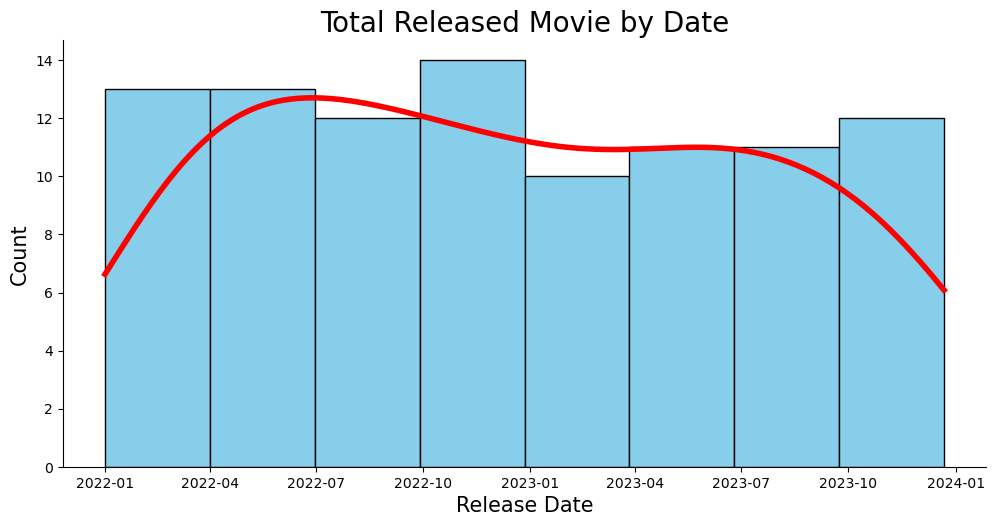

In [23]:
plt.figure(figsize=(15,6))
sns.displot(data=merged, x='Full Date', kind='hist', kde=True, color='r', facecolor='skyblue', edgecolor='black',
            line_kws={'lw': 4}, aspect=2)
plt.xlabel('Release Date', size=15)
plt.ylabel('Count', size=15)
plt.title('Total Released Movie by Date', size=20);

We can see here that there is a larger set of movies coming out during the holiday season in 2022, but overall there isn't a big trend in terms of when movies are coming out.

### 2. Movies by Studio:
Let's also see if there are any repeated studios or studios that produce many animated films in Japan.

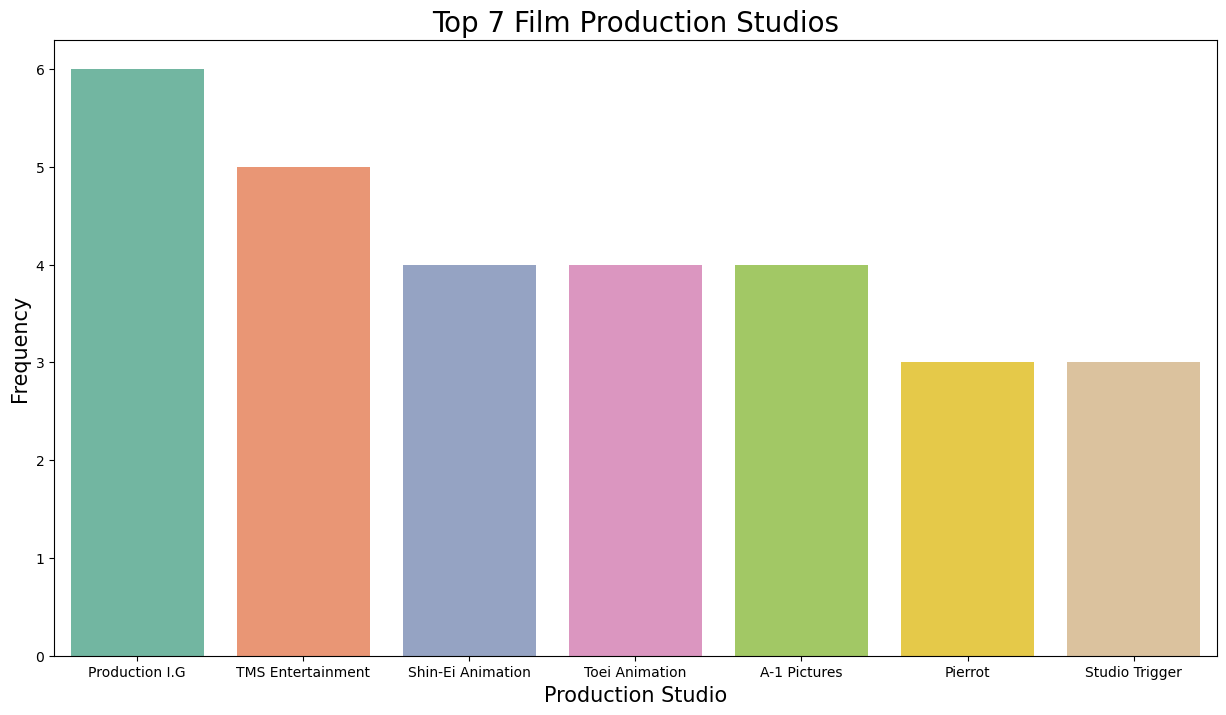

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x="Studio", data= merged, order=merged['Studio'].value_counts().index[0:7], palette='Set2')
plt.xlabel('Production Studio', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Top 7 Film Production Studios', size=20);

### 3. Movies by Director:
Similarly, let's see if there are any hotshot directors who have directed many animation films!

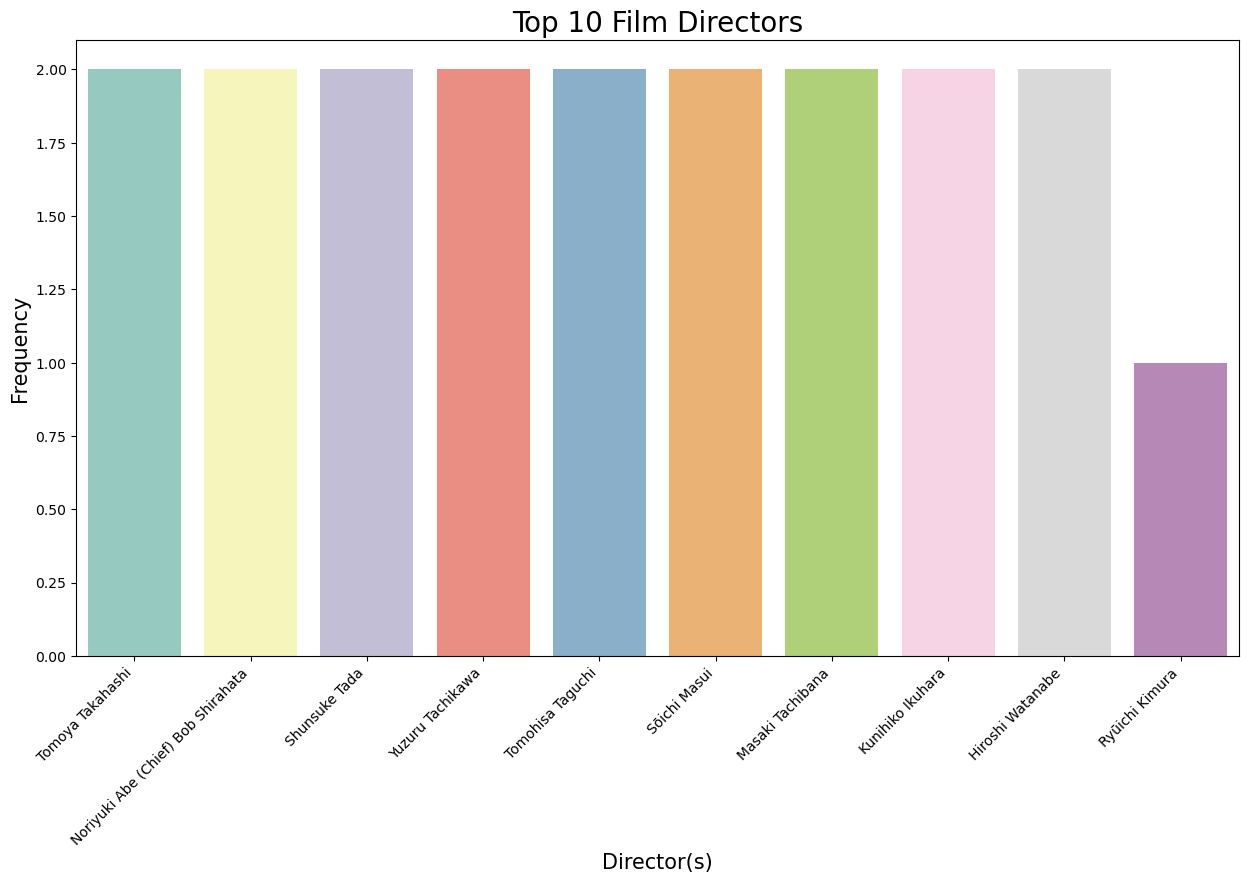

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x="Director(s)", data= merged, order=merged['Director(s)'].value_counts().index[0:10], palette='Set3')
plt.xlabel('Director(s)', size=15)
plt.ylabel('Frequency', size=15)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Film Directors', size=20);

Surprisingly, there are quite a few directors with 2 movies over the course of these two years. The top 9 directors all have 2 films each! 

### 4. Movies by Year:
We already saw this to some degree previously, but it's still nice to know how many movies came from each year.

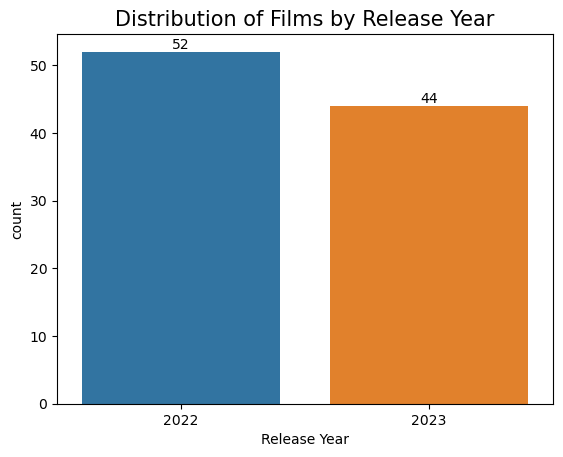

In [26]:
ax = sns.countplot(x="Year", data=merged)
ax.bar_label(ax.containers[0])
plt.xlabel('Release Year')
plt.title('Distribution of Films by Release Year', size=15);

Now that we've taken a look at the data, let's try to build a simple recommender with the web-scraped film information. Again, this will be a very simple model, but can be easily improved with more years' input of film data!

# Recommendation
Similarly to the Disney+ Recommender Mini-Project, we will use similarities in details of films to make a simple recommendation. This will be done using cosine similarity between different datapoint vectors, and will focus on the following features:
1. Title
2. Director
3. Studio

Usually, a good recommender would definitely want to include something like 'description' or 'genre' to make better recommendations. However, due to the simplicity of the data, we will just make recommendations with the aformentioned features. Therefore, please take these recommendations with a grain of salt! 

### 1. Extract features
As mentioned above, we'll first take out the features from the entire dataframe. 

In [28]:
# define features
features = ['Title', 'Director(s)', 'Studio']

# create new dataframe
feature_df = merged[features]
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2023-01-20 to 2022-12-23
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        96 non-null     object
 1   Director(s)  96 non-null     object
 2   Studio       96 non-null     object
dtypes: object(3)
memory usage: 5.1+ KB


### 2. Clean data (spaces, punctuation, etc.)
There are a few entries with spaces and punctuation (for example parenthesis). Clean this to make a bag of words to analyze!

In [29]:
# remove spaces, commas, capitalization
import string

def clean_data(x):
    cleaned = x.translate(str.maketrans('','',string.punctuation))
    return str.lower(cleaned.replace(' ',''))

In [31]:
# keep the titles for index purposes. take out of features list
features.remove ('Title')

In [34]:
# apply filter to feature dataframe and create 'Featured Title' column
for feature in features:
    feature_df[feature] = feature_df[feature].apply(clean_data)
    
# add title back in as featured title
feature_df['Filtered_Title'] = feature_df['Title'].apply(clean_data)
feature_df.head()

,Title,Director(s),Studio,Filtered_Title
Full Date,,,,
2023-01-20,Aikatsu! Mirai e no Starway,ryūichikimura,bandainamcopictures,aikatsumiraienostarway
2023-01-20,Fafner in the Azure: Behind the Line,takashinoto,productionig,fafnerintheazurebehindtheline
2023-01-20,SSSS.Gridman,yoshiyukikaneko,studiotrigger,ssssgridman
2023-01-27,Gold Kingdom and Water Kingdom,kotonowatanabe,madhouse,goldkingdomandwaterkingdom
2023-02-17,Blue Giant,yuzurutachikawa,nut,bluegiant


### 3. Create bag of words for recommendation and reformat
We want to make a big bag of words full of the features to make recommendations from. We'll reformat the dataframe as such, and make the unfiltered title into the index (it's currently still the release date).

In [38]:
# create bag of words and reformat dataframe
feature_df['bag_of_words'] = ''
feature_df['bag_of_words'] = feature_df[feature_df.columns[1:]].apply(lambda x: ' '.join(x), axis=1)
feature_df.set_index('Title', inplace=True)

In [39]:
feature_df.bag_of_words

Title
Aikatsu! Mirai e no Starway                                        bandainamcopictures aikatsumiraienostarway 
Fafner in the Azure: Behind the Line                               productionig fafnerintheazurebehindtheline 
SSSS.Gridman                                                                        studiotrigger ssssgridman 
Gold Kingdom and Water Kingdom                                            madhouse goldkingdomandwaterkingdom 
Blue Giant                                                                                      nut bluegiant 
                                                                                   ...                        
The First Slam Dunk                                          toeianimationdandelionanimationstudio thefirst...
Kaiketsu Zorori: La La La Sutā Tanjō                         ajiadoanimationworksbandainamcopictures kaiket...
Kaguya-sama: Love Is War – The First Kiss That Never Ends    a1pictures kaguyasamaloveiswar–thefirstkissth

## Prediction and Recommendation
Now, we'll use a TDIDF vectorizer and cosine similarity between the different bag of words entries to make a recommendation based on similarities in the chosen features. These are taken from sklearn.

In [40]:
# imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### 1. TFIDF Vectorizer and Cosine similarity
TFIDF allows us to compare word frequency based on the English language. Cosine similarity will then compare these matrices based on similar words (actually string chains) and make a recommendation.

**Note**: Some titles/names are in Japanese (as this is a project focused on anime), so not all word importance will be as accurate. Again, the focus of this project is using web-scraped data to design a system!

In [41]:
# init tfidf vectorizer
tfidf = TfidfVectorizer(stop_words='english')
# creates a matrix with bag of words for similarity comparison
tfidf_matrix = tfidf.fit_transform(feature_df['bag_of_words'])

In [42]:
# cosine similarity
sim = cosine_similarity(tfidf_matrix)

### 2. Create Recommendation
Now that we have everything set up, we should be able to make a function to make a recommendation based on input title and feature similarities.

In [43]:
# recommendation function
def recommend(title, top_n=5):
    # create a copy of the dataframe to search for index and return later as result
    data = feature_df.reset_index()
    index_movie = data[data['Title'] == title].index
    
    # find similarity array
    sim_scores = sim[index_movie]
    
    #add to df to return
    data['similarity'] = sim_scores.T
    
    # sort values and return top related movies
    data = data.sort_values(by='similarity', ascending=False).iloc[1:top_n+1, :]
    data.set_index('Title', inplace=True) # reset index to original title again
    
    return data[['similarity']]

## Test out the recommendation system!
The recommender should work now! Let's plug in a few movie titles to see what kind of (slightly wacky) recommendations it returns! Refer to the 2023 wiki page: I will try the first movie in the list as a first test.

### 1. Aikatsu! Mirai e no Starway

In [44]:
recommend('Aikatsu! Mirai e no Starway')

,similarity
Title,
Fafner in the Azure: Behind the Line,0.0
Laid-Back Camp Movie,0.0
Idol Bu Show,0.0
Dragon Ball Super: Super Hero,0.0
Teasing Master Takagi-san: The Movie,0.0


No similarity... looks like this film is just unique in terms of the features we defined. Let's try to find a film with a shared feature - perhaps a shared film studio as we saw earlier in the data. The top film studio was Production I.G

### 2. 	Fafner in the Azure: Behind the Line (Studio I.G film)

In [47]:
recommend('Fafner in the Azure: Behind the Line', 6)

,similarity
Title,
Rakudai Majo: Fūka to Yami no Majo,0.355918
Legend of the Galactic Heroes: The New Thesis - Clash,0.355918
Legend of the Galactic Heroes: The New Thesis - Intrigue,0.355918
Psycho-Pass Providence,0.355918
The Deer King,0.355918
That Time I Got Reincarnated as a Slime: The Movie – Scarlet Bond,0.000000


Here we see 5 other films with significantly higher similarity! If you refer to the Studio I.G films from before, there were 6 total films by this studio. 

### 3. SSSS.Gridman 
The final film to test is SSSS.Gridman. It has some shared production studios and seems to have other movies in a series or franchise (other SSSS films). Let's see if this will create better recommendations!

In [48]:
recommend('SSSS.Gridman')

,similarity
Title,
SSSS.Dynazenon,0.424022
Gridman Universe,0.424022
Aikatsu! Mirai e no Starway,0.000000
Re:cycle of Penguindrum (part 1),0.000000
Backflip!!,0.000000


We see here that in this case, there are two other titles with higher similarity! Both have a similarity in the title ('SSSS' and 'Gridman'), so it makes sense that they are listed here.

In [49]:
merged[merged['Title'] == 'SSSS.Dynazenon']

,Release date,Year,Title,Studio,Director(s),Running time (minutes),FullDate
Full Date,,,,,,,
2023-03-10,March 10,2023,SSSS.Dynazenon,Studio Trigger,Yoshihiro Miyajima,N/a,1900-03-10


In [50]:
merged[merged['Title'] == 'Gridman Universe']

,Release date,Year,Title,Studio,Director(s),Running time (minutes),FullDate
Full Date,,,,,,,
2023-03-24,March 24,2023,Gridman Universe,Studio Trigger,Akira Amemiya,118.0,1900-03-24


Here, you can also see that they share the same studio, 'Studio Trigger'. Interstingly, they are also released very closely to each other!

# Conclusion
In this project, we were able to take some information from an online database (Wikipedia), scrape the information from the HTML, and use it to build a simple recommendation system. Recommendations are a bit crude, due to the lack of available information, but it works as expected and gives some simple recommendations.

The goal of using web-scraped data for modeling/data analysis was met, and with further improvements and data, a stronger, more robust recommender could also easily be implemented.